In [1]:
import sys

import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
# read the data

train = pd.read_csv('data/train.csv', index_col=['Id'])
test = pd.read_csv('data/test.csv', index_col=['Id'])

In [3]:
# show shapes
print('train:', train.shape)
print('test:', test.shape)

train: (1460, 80)
test: (1459, 79)


In [4]:
# check columns integrity
print('missing column:', set(train.columns) - set(test.columns))
del test

missing column: {'SalePrice'}


D:\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


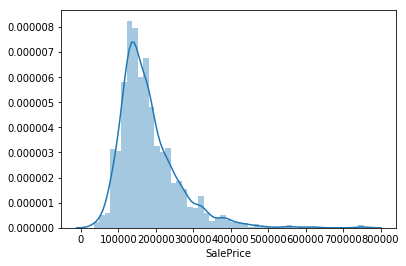

In [5]:
# that's what we are trying to predict - the sale price
sns.distplot(train.SalePrice);

In [6]:
from sklearn.model_selection import train_test_split

# split the dataset to with and without labels
train_no_sale_price = train.drop(labels=['SalePrice'], axis=1)
train_sale_price = train['SalePrice']

# split the train set to 70/30 train/test
x_train, x_test, y_train, y_test = train_test_split(train_no_sale_price, 
                                                    train_sale_price, 
                                                    test_size=0.3, 
                                                    random_state=4330)

# Make sure correct data fell int the correct variables
for df in [x_train, x_test, y_train, y_test]:
    print(df.shape)

(1022, 79)
(438, 79)
(1022,)
(438,)


In [7]:
# check the data types in each column
x_train.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
128,45,RM,55.0,4388,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Unf,5,7,1930,1950,Gable,CompShg,WdShing,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,LwQ,116,Unf,0,556,672,GasA,Ex,Y,SBrkr,840,0,0,840,0,0,1,0,3,1,TA,5,Typ,1,TA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal


In [8]:
# string values causing issues, let's fix em

# how many of these 'Abnorml' values are there
print((x_train.values == 'Abnorml').sum())

col_idx = pd.np.argmax(x_train.values == 'Abnorml', axis=1).max()

x_train.iloc[:, col_idx].value_counts()

76


Normal     825
Partial     96
Abnorml     76
Family      16
Alloca       7
AdjLand      2
Name: SaleCondition, dtype: int64

In [9]:
numeric_column_names = x_train.describe().columns
print(numeric_column_names)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


In [10]:
# get null columns
nulls = x_train[numeric_column_names].isnull().sum()
nulls[nulls > 0]

LotFrontage    171
MasVnrArea       4
GarageYrBlt     49
dtype: int64

In [11]:
# fill NaN values with 0
x_train[numeric_column_names] = x_train[numeric_column_names].fillna(0)
x_test[numeric_column_names] = x_test[numeric_column_names].fillna(0)
x_train.head(1)

D:\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
128,45,RM,55.0,4388,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Unf,5,7,1930,1950,Gable,CompShg,WdShing,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,LwQ,116,Unf,0,556,672,GasA,Ex,Y,SBrkr,840,0,0,840,0,0,1,0,3,1,TA,5,Typ,1,TA,NaN,0.0,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal


In [12]:
x_train[numeric_column_names].isnull().sum(axis=0).value_counts()

0    36
dtype: int64

In [13]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train[numeric_column_names], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
regressor.score(x_train[numeric_column_names], y_train)

0.7981263665303393

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


categorical_columns = train.dtypes[train.dtypes == 'object'].index
print(categorical_columns)


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [16]:
# label encoded
train = train.fillna("")
encoders = {col: LabelEncoder().fit(train[col]) for col in categorical_columns}

In [17]:
# one-hot encoded

def encode_categorical(data, columns, encoders):
    data = data.fillna("")
    return pd.DataFrame({col: encoders[col].transform(data[col]) for col in columns},
                        index = data.index)

train_encoded = encode_categorical(train, categorical_columns, encoders)
train_encoded.head(8)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,1,0,3,3,0,4,0,5,2,2,0,5,1,1,12,13,2,2,4,2,3,4,4,3,6,1,0,1,5,2,6,0,2,2,5,5,2,0,0,0,8,4
2,3,1,0,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,3,4,1,3,4,2,1,6,1,0,1,5,3,6,5,2,2,5,5,2,0,0,0,8,4
3,3,1,0,0,3,0,4,0,5,2,2,0,5,1,1,12,13,2,2,4,2,3,4,3,3,6,1,0,1,5,2,6,5,2,2,5,5,2,0,0,0,8,4
4,3,1,0,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,3,4,0,4,2,4,1,6,1,2,1,5,2,6,3,6,3,5,5,2,0,0,0,8,0
5,3,1,0,0,3,0,2,0,15,2,2,0,5,1,1,12,13,2,2,4,2,3,4,1,3,6,1,0,1,5,2,6,5,2,2,5,5,2,0,0,0,8,4
6,3,1,0,0,3,0,4,0,11,2,2,0,0,1,1,12,13,3,3,4,5,3,4,4,3,6,1,0,1,5,3,6,0,2,3,5,5,2,0,3,3,8,4
7,3,1,0,3,3,0,4,0,21,2,2,0,2,1,1,12,13,4,2,4,2,1,4,1,3,6,1,0,1,5,2,6,3,2,2,5,5,2,0,0,0,8,4
8,3,1,0,0,3,0,0,0,14,4,2,0,5,1,1,6,6,4,3,4,1,3,4,3,1,2,1,0,1,5,3,6,5,2,2,5,5,2,0,0,3,8,4


In [18]:
one_hot_encoder = OneHotEncoder().fit(train_encoded)
one_hot_x_train = one_hot_encoder.transform(encode_categorical(x_train[categorical_columns], categorical_columns, encoders))
one_hot_x_test = one_hot_encoder.transform(encode_categorical(x_test[categorical_columns], categorical_columns, encoders))

In [19]:
cat_regression = LinearRegression().fit(one_hot_x_train, y_train)
print(cat_regression.score(one_hot_x_train, y_train))
print(cat_regression.score(one_hot_x_test, y_test))

0.8770468421966168
0.7430500254138905


In [20]:
x_train[numeric_column_names].shape, one_hot_x_train.shape

((1022, 36), (1022, 268))

In [27]:
new_x_train = pd.np.concatenate([one_hot_x_train.todense(), x_train[numeric_column_names]], axis=1)
new_x_test = pd.np.concatenate([one_hot_x_test.todense(), x_test[numeric_column_names]], axis=1)
print(new_x_train.shape, new_x_test.shape)

(1022, 304) (438, 304)


In [28]:
all_data_lr = LinearRegression().fit(new_x_train, y_train)
print(all_data_lr.score(new_x_train, y_train))
print(all_data_lr.score(new_x_test, y_test))

0.9374772944028724
-14761240.716965368
